In [10]:
%matplotlib notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import skimage
from skimage import io
from skimage.viewer import ImageViewer

In [2]:
img = io.imread(f'puppy.jpg')
# img = skimage.transform.rescale(img, 0.1)
print(img.shape)

(734, 1100, 3)


<IPython.core.display.Javascript object>


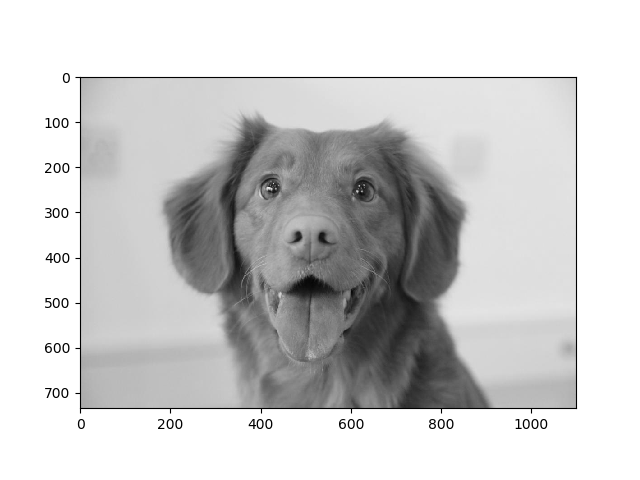

In [11]:
gray_image = img.copy()

y_, x_, _ = gray_image.shape
for x in range(x_):
    for y in range(y_):
        gray = np.mean(gray_image[y, x])
        gray_image[y, x] = gray
w

In [4]:
def get_neighborhood(im, x_, y_, d_size):
    size = int(d_size / 2)
    if d_size % 2 == 0:
        return im[x_ - size + 1: x_ + size + 1, 
                  y_ - size + 1: y_ + size + 1, 
                  0]
    return im[x_ - size : x_ + size + 1, 
                  y_ - size : y_ + size + 1, 
                  0]

def apply_mask(im, mask):
    mask = np.array(mask)
    x_max, y_max, _ = im.shape
    neigh_size, _ = mask.shape
    
    new_im = im.copy()
    for x in range(1, x_max - 1):
        for y in range(1, y_max - 1):
            neighs = np.array(get_neighborhood(im, x, y, neigh_size))  
            applied_matrix = neighs * mask
            summed = applied_matrix.flatten().sum()
            new_im[x][y] = summed
    return new_im

<IPython.core.display.Javascript object>


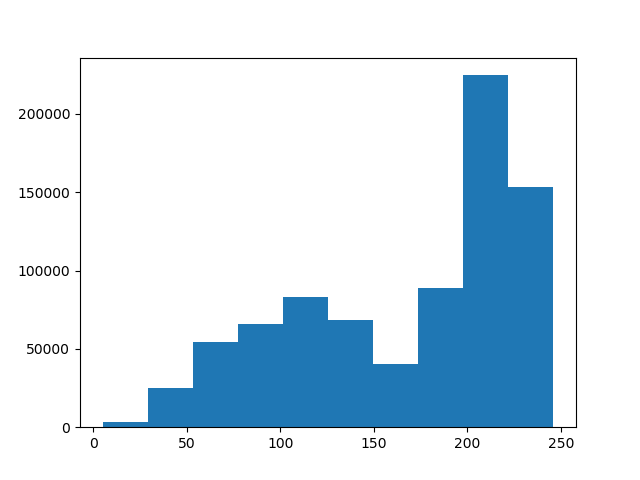

(array([  3196.,  24727.,  54105.,  66213.,  83125.,  68615.,  40230.,
         88843., 224754., 153592.]),
 array([  5. ,  29.1,  53.2,  77.3, 101.4, 125.5, 149.6, 173.7, 197.8,
        221.9, 246. ]),
 <a list of 10 Patch objects>)

In [5]:
im = gray_image.copy()
hist = np.bincount(im[:, :, 0].flatten())
# plt, axarr = plt.subplots(1, 1)

f, axarr = plt.subplots(1,1)
axarr.hist(im[:, :, 0].flatten())

<IPython.core.display.Javascript object>


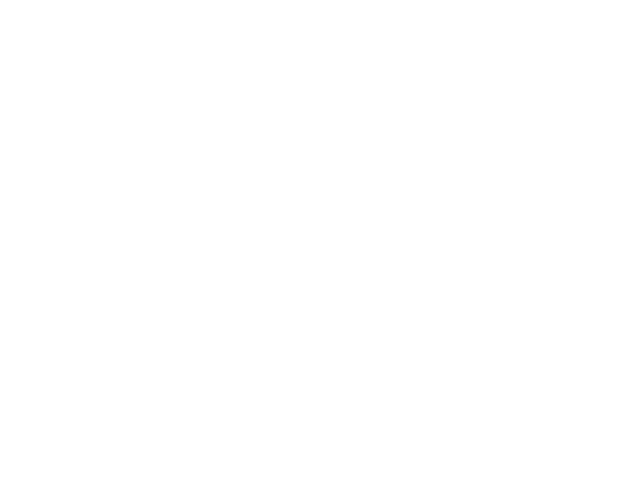

In [6]:
gray_image = gray_image
im = apply_mask(gray_image,
[
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9]
])
im = apply_mask(im,
[
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]
])
f, axarr = plt.subplots(1,1)
axarr.imshow(im)

In [7]:
def threshold(im, thr):
    x_max, y_max, _ = im.shape
    
    new_im = im.copy()
    for x in range(1, x_max - 1):
        for y in range(1, y_max - 1):
            new_im[x][y] = 0 if im[x][y][0] < thr else 255
    return new_im

<IPython.core.display.Javascript object>


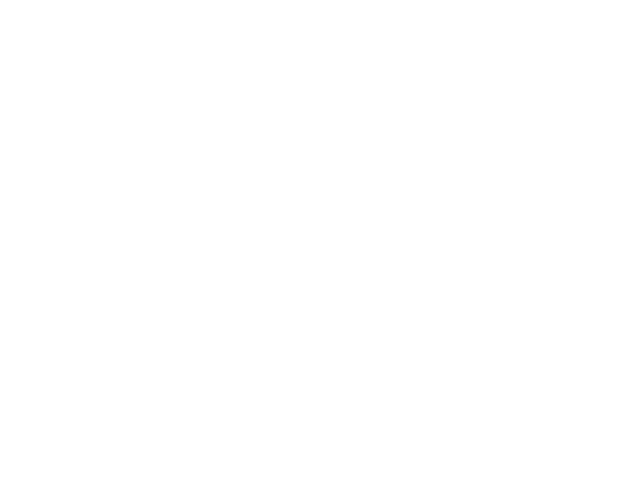

In [8]:
f, axarr = plt.subplots(1,1)
axarr.imshow(threshold(gray_image, 150))

In [9]:
def get_min(im):
    hist_arr = np.repeat(0, 256)
    for px in im[:,:,0].flatten():
        hist_arr[px] += 1

    min_val = 256
    min_i = 0
    for i, val in enumerate(hist_arr):
        if i not in range(40, 210):
            continue
        if min_val < val:
            min_val = val
            min_i = i
    return min_i, min_val